Name : Prince Kumar
Roll No :23
Msc Data science


---



In [58]:
from google.colab import drive    # mounting drive to load the data we have saved earlier in assignment 1

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
import pandas as pd
import nltk
from nltk import bigrams

import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np

import collections
from collections import Counter
from nltk.corpus.reader.plaintext import PlaintextCorpusReader

In [60]:
df = pd.read_csv("/content/drive/MyDrive/nlp corpus/corpus.csv")

In [61]:
df

,Unnamed: 0,paper_id,abstract,body_text,abstract_word_count,body_word_count,body_unique_words,abstract_unique_words
0,0,173417343f37c299df8c0fe888cf316b78630e16,inflammation immunity potential target therapy...,january 26 2021 sum 100 346 160 confirmed case...,37,2856,1185,33
1,1,19591d13b1530344fb152de55901f77b043b6a1f,pandemic covid 19 affected many countries medi...,globe except ongoing cycles fertility preserva...,162,2461,977,132
2,2,25bcee9d98126a730a011cc3147668ffe935520e,note reports new research certified peer guide...,cardiovascular cv manifestations covid 19 infe...,1397,7452,1531,604
3,3,05cfa842a87231c5c2871d2194835709b02bc046,tropical trees calophyllum genus calophyllacea...,large tree tropical rain forests distributed m...,149,1640,754,94
4,4,250d59ab75d8f45de88ab498f3483ead9d13be63,major goals molecular evolutionary biology und...,dna sequences called the blueprint life protei...,77,7424,1813,62
...,...,...,...,...,...,...,...,...
425,425,5978ed61b14091115851ab1409069f55551ba114,new zealand existing primary sector growth low...,new zealand long economy based primary industr...,220,3433,1370,131
426,426,02dbd61a09c3a529e687ae3780e82f5742e222e8,membrane channels transporters receptors const...,since solution nmr determine structure transme...,89,2007,962,81
427,427,23ce5b54778898d2c19e605d8cc6ac6038493c7b,diagnose infected patient soon possible corona...,coronavirus outbreak covid 19 occurred china d...,148,2697,834,99
428,428,0b9e7451552da6af9d62fb0cb98958f17087f7b4,background covid 19 pandemic lockdown cpl lead...,current covid 19 pandemic challenges diagnosti...,173,2445,957,124


Taking abstract column for our n grams model

In [62]:
data = df["abstract"]   # all the rows of abstract data
data1  =  ""             
for i in data:
  data1 = data1 + i
corpus = data1.split()      # our final corpus


  
len(corpus)         #len of corpus

69340

In [63]:
train_size = int(0.9*len(corpus))    # 90% of the abstract column data accounts for the training size 

test_size = int(0.1*len(corpus))     # 10% of the abstract column data accounts for the training size 


In [64]:
train_data = corpus[:train_size]                 
test_data = corpus[train_size+1:train_size+test_size]

In [65]:
len(train_data),len(test_data)

(62406, 6933)

Bigrams for our corpus

In [66]:
pd.Series(nltk.ngrams(train_data, 2)).value_counts()

(covid, 19)                   385
(sars, cov)                   292
(cov, 2)                      253
(p, r)                        122
(p, 0)                         91
                             ... 
(written, instructions)         1
(characterize, 20)              1
(follows, power)                1
(program, increased)            1
(calophyllaceae, chemical)      1
Length: 50789, dtype: int64

#Trigrams

In [78]:
pd.Series(nltk.ngrams(train_data, 3)).value_counts()
trigrams = pd.Series(nltk.ngrams(train_data, 3))

In [79]:
trigrams

0        (inflammation, immunity, potential)
1              (immunity, potential, target)
2               (potential, target, therapy)
3                    (target, therapy, sars)
4                       (therapy, sars, cov)
                        ...                 
62399            (infections, cities, china)
62400                 (cities, china, would)
62401                   (china, would, peak)
62402                     (would, peak, mid)
62403                  (peak, mid, february)
Length: 62404, dtype: object

4 - grams

In [93]:
pd.Series(nltk.ngrams(train_data, 4)).value_counts()



(p, r, e, p)                                                 56
(r, e, p, r)                                                 56
(you, r, n, l)                                               56
(r, n, l, p)                                                 56
(l, p, r, e)                                                 56
                                                             ..
(invasive, alien, plant, animal)                              1
(interests, collective, interestsbiomarkers, progression)     1
(sensitivity, 30, minutes, accurately)                        1
(cov, 2, infection, review)                                   1
(social, contacts, case, testing)                             1
Length: 60121, dtype: int64

In [94]:
fourgram = pd.Series(nltk.ngrams(train_data, 4))


I have shown some visualization of bigrams , trigrams  and fourgrams.

In [69]:
bigrams_series = (pd.Series(nltk.ngrams(train_data, 2)).value_counts())[:12]
trigrams_series = (pd.Series(nltk.ngrams(train_data, 3)).value_counts())[:12]
fourgrams_series = (pd.Series(nltk.ngrams(train_data, 4)).value_counts())[:12]


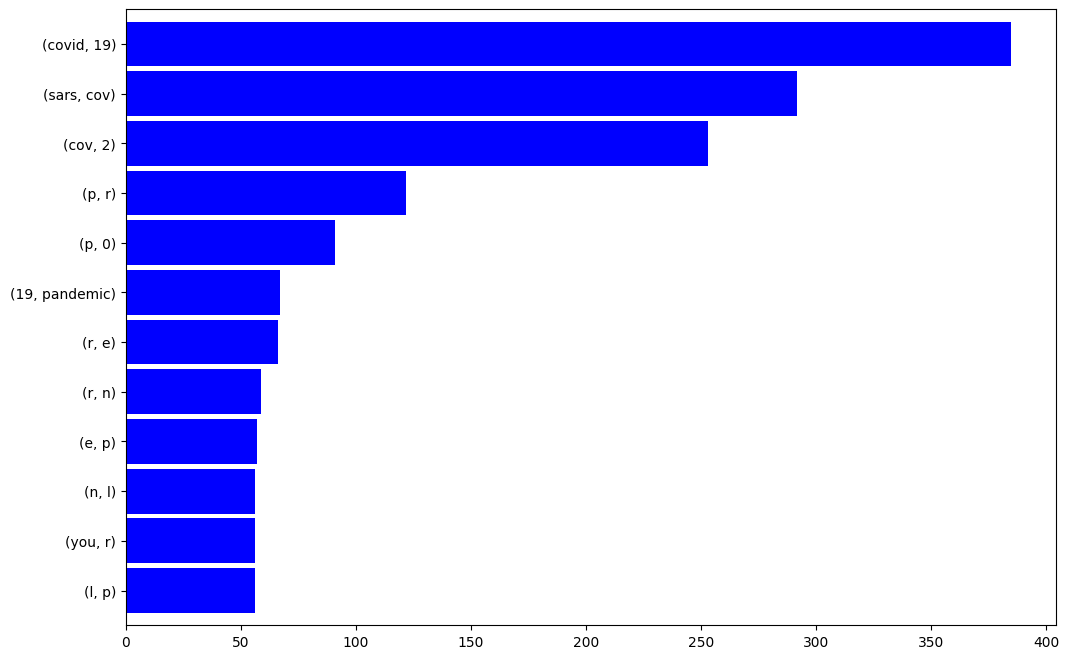

In [70]:
#  Let’s create a horizontal bar graph:
bigrams_series.sort_values().plot.barh(color='blue', width=.9, figsize=(12, 8))

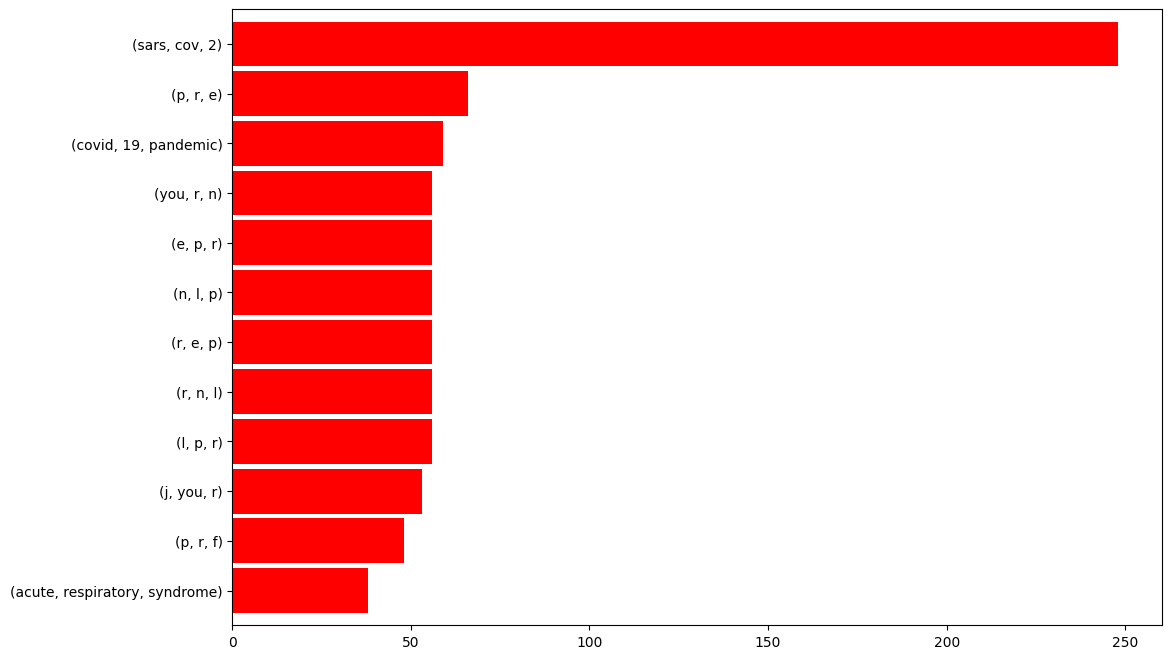

In [71]:
trigrams_series.sort_values().plot.barh(color='red', width=.9, figsize=(12, 8))

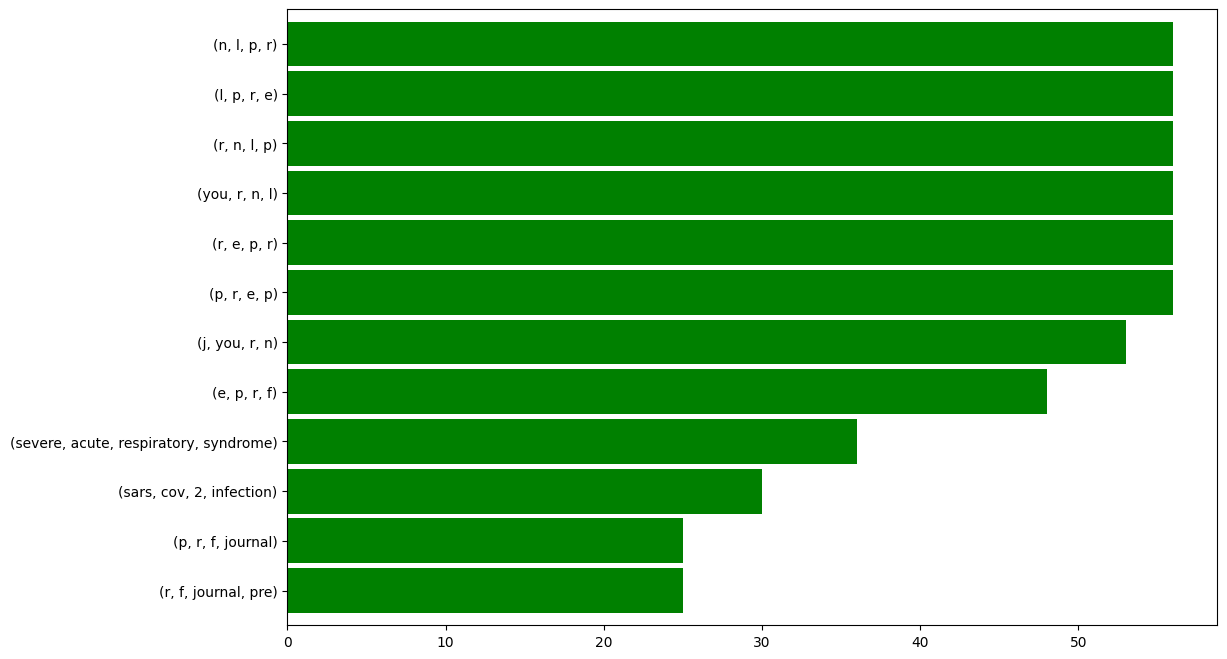

In [72]:
fourgrams_series.sort_values().plot.barh(color='Green', width=.9, figsize=(12, 8))

In [95]:
bigram_model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
for w1, w2 in bigrams(corpus):
            bigram_model[w1][w2] += 1


In [96]:
bigram_model

defaultdict(<function __main__.<lambda>>,
            {'inflammation': defaultdict(<function __main__.<lambda>.<locals>.<lambda>>,
                         {'ace': 1,
                          'and': 1,
                          'apoptosis': 1,
                          'considered': 1,
                          'covid': 1,
                          'dynamic': 1,
                          'established': 1,
                          'g': 1,
                          'hepatic': 1,
                          'immunity': 1,
                          'inflammaging': 1,
                          'lipid': 1,
                          'multiple': 1,
                          'nets': 2,
                          'oxidative': 1,
                          'pro': 1,
                          'senescence': 1,
                          'severe': 3,
                          'triggers': 1}),
             'immunity': defaultdict(<function __main__.<lambda>.<locals>.<lambda>>,
                         {

In [97]:
trigram_model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
for w1, w2 , w3 in trigrams:
            trigram_model[(w1,w2)][w3] += 1


In [98]:
trigram_model

defaultdict(<function __main__.<lambda>>,
            {('inflammation',
              'immunity'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>>, {'potential': 1}),
             ('immunity',
              'potential'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>>, {'target': 1}),
             ('potential',
              'target'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>>, {'therapy': 1}),
             ('target',
              'therapy'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>>, {'sars': 1}),
             ('therapy',
              'sars'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>>, {'cov': 1}),
             ('sars',
              'cov'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>>, {'1': 1,
                          '2': 248,
                          '2covid': 1,
                          '2ecology': 1,
                          '2lassa': 1,
                          '2practicability': 1,
  

In [89]:
fourgram_model = collections.defaultdict(lambda: collections.defaultdict(lambda: 0))
for w1, w2 , w3 , w4 in fourgram:
            fourgram_model[(w1,w2,w3)][w4] += 1


In [99]:
fourgram_model

defaultdict(<function __main__.<lambda>>,
            {('inflammation',
              'immunity',
              'potential'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>>, {'target': 1}),
             ('immunity',
              'potential',
              'target'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>>, {'therapy': 1}),
             ('potential',
              'target',
              'therapy'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>>, {'sars': 1}),
             ('target',
              'therapy',
              'sars'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>>, {'cov': 1}),
             ('therapy',
              'sars',
              'cov'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>>, {'2': 1}),
             ('sars',
              'cov',
              '2'): defaultdict(<function __main__.<lambda>.<locals>.<lambda>>, {'10': 1,
                          '2': 1,
                          '21': 1,
     

#Text generation using Trigrams

In [103]:
from nltk.parse.generate import generate, demo_grammar


In [141]:
def get_ngrams(words,words_tokens):
  ngrams = {}
  

  
  for i in range(len(words_tokens)-words):
    seq = ' '.join(words_tokens[i:i+words])
    print(seq)
    if  seq not in ngrams.keys():
        ngrams[seq] = []
    ngrams[seq].append(words_tokens[i+words])
  return(ngrams)


In [124]:
curr_sequence = ' '.join(words_tokens[0:words])
output = curr_sequence
for i in range(50):
    if curr_sequence not in ngrams.keys():
        break
    possible_words = ngrams[curr_sequence]
    next_word = possible_words[random.randrange(len(possible_words))]
    output += ' ' + next_word
    seq_words = nltk.word_tokenize(output)
    curr_sequence = ' '.join(seq_words[len(seq_words)-words:len(seq_words)])

print(output)

inflammation immunity potential target therapy sars cov 2 und covid 19 auf der grundlage der bis zum 30 05 2020 statements represent carefully concerned expert consensus change contemporary new knowledge appears responsibility concrete management remains local medical team decisions supported recommendations beide autoren haben zu gleichen teilen zum entstehen der arbeit beigetragen dieses


In [125]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Text generation

#Text generation using 4 grams

In [137]:
curr_sequence = ' '.join(words_tokens[0:words])
output = curr_sequence
for i in range(50):
    if curr_sequence not in ngrams.keys():
        break
    possible_words = ngrams[curr_sequence]
    next_word = possible_words[random.randrange(len(possible_words))]
    output += ' ' + next_word
    seq_words = nltk.word_tokenize(output)
    curr_sequence = ' '.join(seq_words[len(seq_words)-words:len(seq_words)])

print(output)

inflammation immunity potential target therapy sars cov 2 total scale analysis review food chemical toxicology https 4 coronavirus disease 19 covid 19 complex disease causes illness ranging 5 mild severe respiratory problems caused novel coronavirus sars 6pandemic covid 19 affected many countries medical services assisted reproductive treatment art hampered purpose assess preparedness art clinics


Which one of the language models (trigram or 4-gram) performed better? Why?

You can see the output makes even more sense with 4-grams. This is largely because our generator is mostly regenerating the same text from the training data, but with some slight improvements to the generator, and a larger corpus, our generator could easily generate new and unique sentences as well.

Efficient ways to handle the large set of parameters (2 marks)

In the above code, dictionary is being used to reduce the time complexity and counter of ngrams is also being used to avoid computation further while modelling or updating.

Is it possible to run any portion of the code in parallel? If yes, which part of the code? If no, why? (2 marks)

Most of the codes above are not bundle up in different functions ,they are fragmented into individual codes , so we can run most of the codes in parallel like we can generate bigrams, trigrams or fourgrams parallel